# 1️⃣ Modelo de Clasificación — Logistic Regression

**Proyecto:** MLY0100 — Análisis y Predicción de Diabetes

**Autor:** Antonio Sepúlveda

**Fecha:** 2025

---
En este notebook implementamos un modelo de **Regresión Logística** para predecir la probabilidad de diabetes usando el dataset procesado en el pipeline Kedro.

## 📚 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 📥 2. Carga del Dataset Limpio
El archivo fue generado por el pipeline Kedro y se encuentra en `data/02_intermediate/diabetes_cleaned.csv`.

In [6]:
df = pd.read_csv("../../mly0100parcial-kedro/data/02_intermediate/diabetes_cleaned.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 🧹 3. Preparación de Datos
Separación de variables predictoras (**X**) y la variable objetivo (**y = Outcome**).

In [8]:
# Variable objetivo
y = df["Diabetes_binary"]
# Variables predictoras
X = df.drop("Diabetes_binary", axis=1)

X.shape, y.shape


((253680, 21), (253680,))

## ✂️ 4. División Train/Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaños:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Tamaños:
X_train: (202944, 21)
X_test: (50736, 21)


## 📏 5. Escalamiento de Variables
La Regresión Logística mejora significativamente con variables escaladas.

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 6. Entrenamiento del Modelo Logistic Regression

In [11]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"🔍 Accuracy del modelo: {accuracy:.4f}")

🔍 Accuracy del modelo: 0.8621


## 📈 7. Reporte de Métricas

In [12]:
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



## 🧩 8. Matriz de Confusión

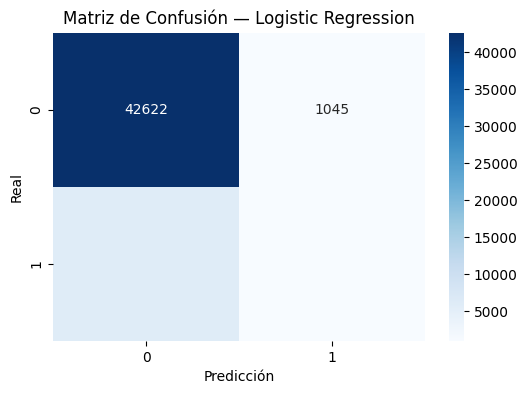

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión — Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## ✅ 9. Conclusiones

- La Regresión Logística ofrece un baseline sólido para clasificación binaria.
- El accuracy obtenido muestra un buen desempeño inicial.
- La matriz de confusión ayuda a ver si hay sesgo hacia clases 0 o 1.
- Más adelante se comparará con modelos más potentes (KNN, Árboles, Random Forest, XGBoost).